Import and load all the libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import joblib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Load the train set downloaded from Kaggle

In [6]:
df = pd.read_csv('Data/train.csv')

Get the basic statistics for the 'SalePrice'

In [7]:
saleprice_stats = df['SalePrice'].describe()
print("Basic statistics for SalePrice:\n", saleprice_stats)

Basic statistics for SalePrice:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


### 2. Visualize the distribution of 'SalePrice'

This part of the analysis helps us understand the distribution of house prices (SalePrice) in the dataset.

    Histogram & KDE Plot: The first graph shows a histogram, which represents the frequency of different sale prices. It also includes a Kernel Density Estimate (KDE), which is a smooth curve that shows the distribution of prices more clearly. This helps us see if the prices are evenly distributed or if there are any obvious patterns, such as most houses being in a certain price range.

    Box Plot: The second graph is a box plot, which gives us a summary of the price data by showing the median (middle value), the spread of prices, and any potential outliers (unusually high or low prices). Outliers can be important to identify, as they may represent rare events or data issues.

Together, these visualizations give a comprehensive view of how house prices are distributed in the dataset, which is essential for understanding the data before making any predictions.


Esta parte del análisis nos ayuda a entender la distribución de los precios de las casas (SalePrice) en el conjunto de datos.

    Histograma y gráfico KDE: El primer gráfico muestra un histograma, que representa la frecuencia de los diferentes precios de venta. También incluye una Estimación de Densidad de Kernel (KDE), que es una curva suave que muestra la distribución de los precios de manera más clara. Esto nos ayuda a ver si los precios están distribuidos de manera uniforme o si hay patrones evidentes, como que la mayoría de las casas estén en un rango de precio determinado.

    Gráfico de caja (Box Plot): El segundo gráfico es un gráfico de caja, que nos da un resumen de los datos de precios mostrando la mediana (valor medio), el rango de los precios y cualquier valor atípico (precios inusualmente altos o bajos). Los valores atípicos pueden ser importantes de identificar, ya que pueden representar eventos raros o problemas en los datos.

Juntas, estas visualizaciones proporcionan una visión integral de cómo se distribuyen los precios de las casas en el conjunto de datos, lo cual es esencial para entender los datos antes de realizar cualquier predicción.

Text(0.5, 1.0, 'SalePrice Distribution')

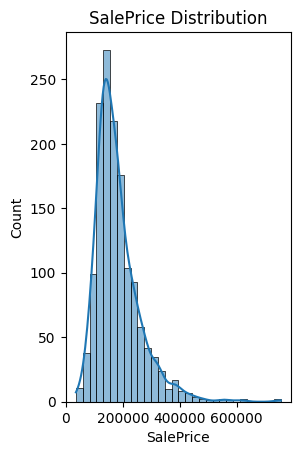

In [8]:
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('SalePrice Distribution')

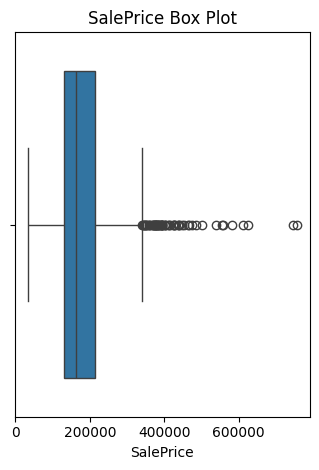

In [9]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['SalePrice'])
plt.title('SalePrice Box Plot')

plt.tight_layout()
plt.show()

## Step 2: Exploring Numerical Features

Correlation with Sale Price

    Correlation Calculation: The first step involves calculating how strongly different numerical features (such as square footage, number of bathrooms, etc.) are related to the house sale price. This is done by computing the correlation coefficient between each feature and the target variable SalePrice. The correlation coefficient ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation). A higher positive value means the feature has a strong positive relationship with the price.

    Displaying Top Features: The next step sorts the features by their correlation with SalePrice and displays the top 10 most important features. This helps us understand which factors influence the price of a house the most.

    Heatmap of Correlations: A heatmap is plotted to show the correlation matrix of all numerical features. The heatmap allows us to visually assess how features are related to each other and how strongly they correlate with SalePrice. For example, we may see that features like GrLivArea (ground living area) and OverallQual (overall quality) have high correlations with the sale price.

    Bar Chart of Correlations: A bar chart is then plotted to display the top 10 features that are most strongly correlated with SalePrice. This gives a clear, easily understandable visual of the factors that affect house prices the most.

    Threshold Filtering: We then set a threshold (in this case, 0.2) to filter out features that are weakly correlated with the target variable (SalePrice). This helps us focus on the features that have a significant impact on house prices. We only keep features with a correlation above this threshold.

    Handling Missing Values: Missing values are handled by filling them in with the mean (average) value for each feature, ensuring that we don't lose any valuable data. For specific features like GarageYrBlt, the missing values are assumed to mean "no garage," so we replace these missing values with 0.

Visualizations Explained:

    Heatmap: The heatmap provides a visual representation of how features are correlated with each other. The cooler colors indicate weaker correlations, while the warmer colors indicate stronger correlations.
    Bar Chart: The bar chart shows the features that have the most influence on the price of the house, making it easy to see which features are the most important for predictions.




Correlación con el Precio de Venta

    Cálculo de la Correlación: El primer paso consiste en calcular qué tan fuertemente se relacionan diferentes características numéricas (como el área construida, el número de baños, etc.) con el precio de venta de las casas. Esto se hace calculando el coeficiente de correlación entre cada característica y la variable objetivo SalePrice. El coeficiente de correlación varía de -1 (correlación negativa perfecta) a +1 (correlación positiva perfecta). Un valor positivo alto significa que la característica tiene una relación fuerte y positiva con el precio.

    Mostrar las Principales Características: El siguiente paso ordena las características por su correlación con SalePrice y muestra las 10 más importantes. Esto nos ayuda a entender qué factores afectan más el precio de una casa.

    Mapa de Calor de Correlaciones: Se traza un mapa de calor para mostrar la matriz de correlación de todas las características numéricas. El mapa de calor nos permite evaluar visualmente cómo se relacionan las características entre sí y qué tan fuertemente se correlacionan con SalePrice. Por ejemplo, podemos ver que características como GrLivArea (área habitable en el suelo) y OverallQual (calidad general) tienen correlaciones altas con el precio de venta.

    Gráfico de Barras de Correlaciones: Luego, se traza un gráfico de barras para mostrar las 10 características más fuertemente correlacionadas con SalePrice. Esto nos da una visualización clara y fácil de entender de los factores que más afectan los precios de las casas.

    Filtrado por Umbral: A continuación, establecemos un umbral (en este caso, 0.2) para filtrar las características que tienen una correlación débil con la variable objetivo (SalePrice). Esto nos ayuda a centrarnos en las características que tienen un impacto significativo en los precios de las casas. Solo mantenemos las características cuya correlación esté por encima de este umbral.

    Manejo de Valores Faltantes: Los valores faltantes se manejan completándolos con el valor medio (promedio) de cada característica, asegurando que no perdamos datos valiosos. Para características específicas como GarageYrBlt, los valores faltantes se asumen como "sin garage", por lo que reemplazamos estos valores faltantes con 0.

Visualizaciones Explicadas:

    Mapa de Calor: El mapa de calor proporciona una representación visual de cómo se correlacionan las características entre sí. Los colores más fríos indican correlaciones débiles, mientras que los colores más cálidos indican correlaciones fuertes.
    Gráfico de Barras: El gráfico de barras muestra las características que más influyen en el precio de la casa, lo que facilita ver cuáles son las características más importantes para las predicciones.

In [10]:
numerical_features = df.select_dtypes(include=[np.number])

In [11]:
correlation_matrix = numerical_features.corr()

In [12]:
corr_with_saleprice = correlation_matrix["SalePrice"].sort_values(ascending=False)

In [13]:
corr_with_saleprice = correlation_matrix["SalePrice"].sort_values(ascending=False)

In [14]:
print("Top 10 features correlated with SalePrice:")
print(corr_with_saleprice.head(10))

Top 10 features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


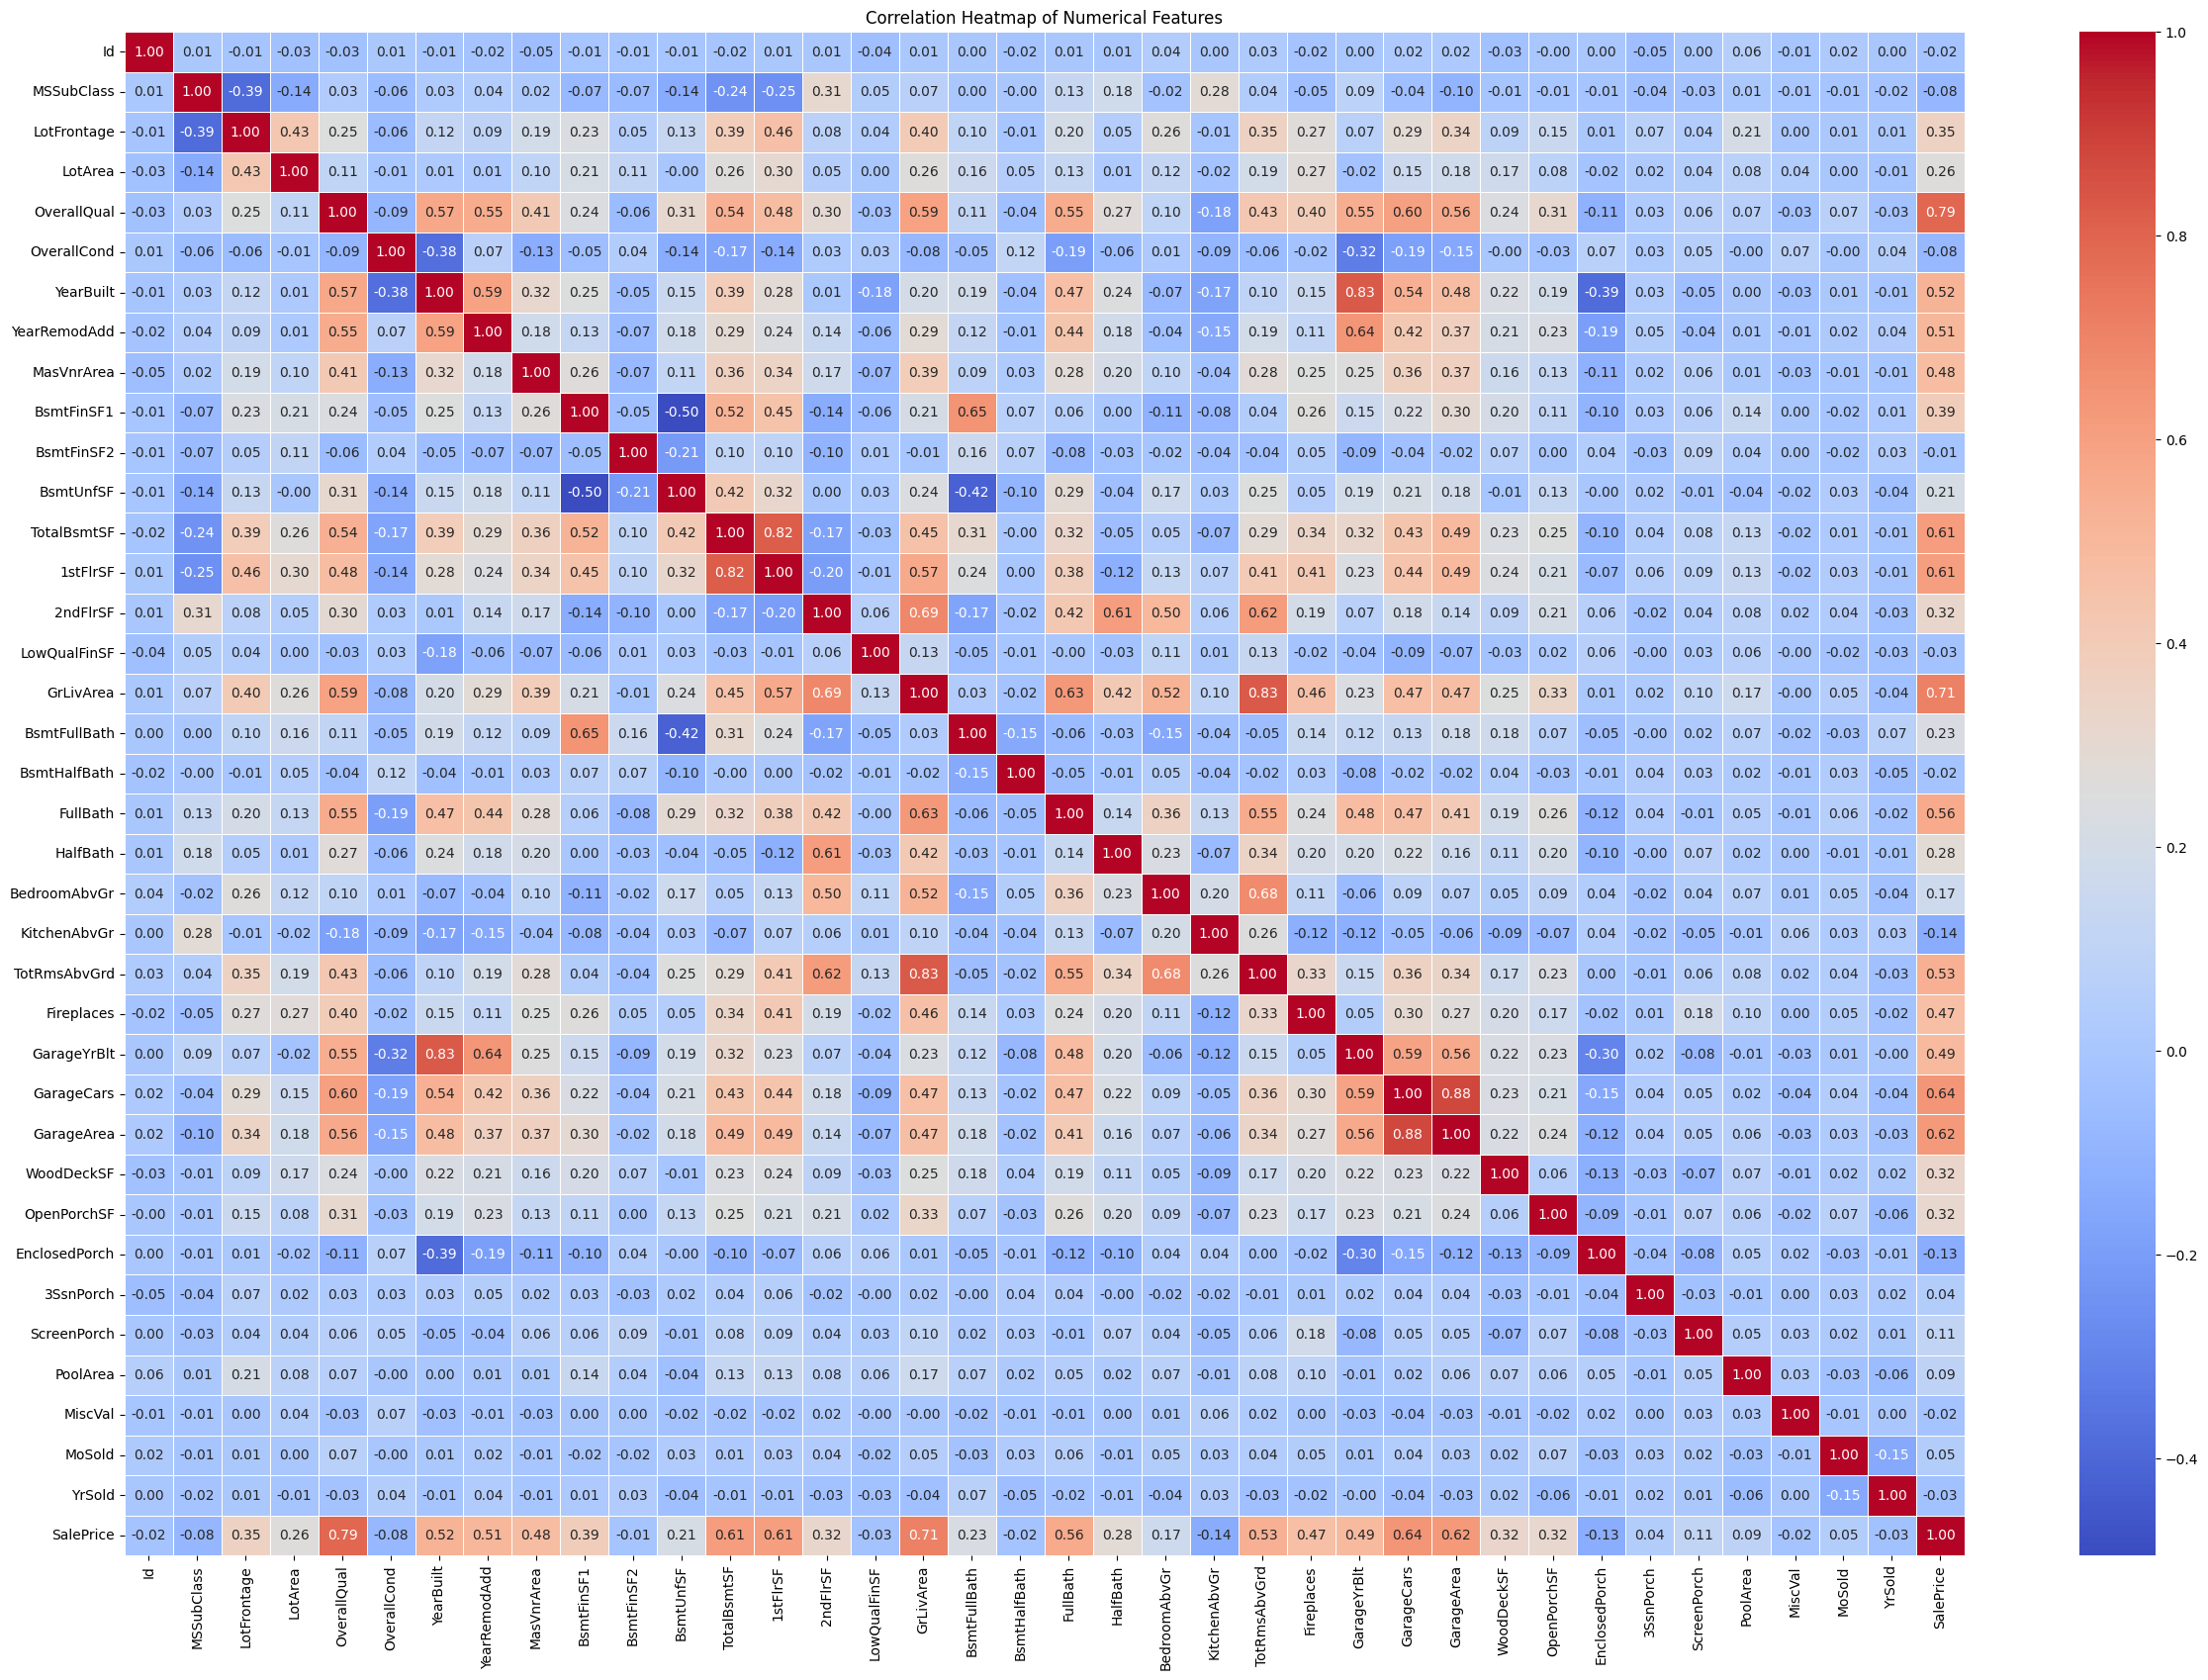

In [15]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

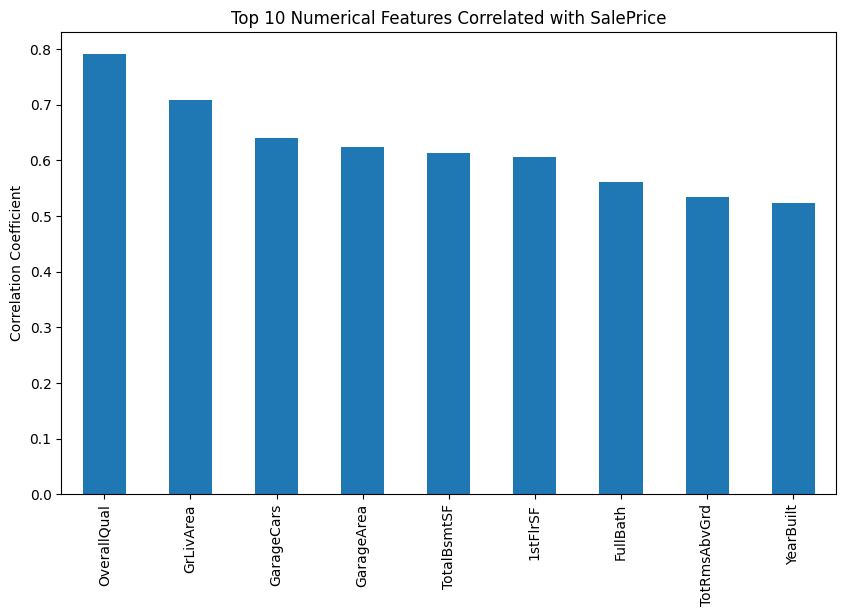

In [16]:
plt.figure(figsize=(10, 6))
corr_with_saleprice.head(10).drop("SalePrice").plot(kind='bar')
plt.title("Top 10 Numerical Features Correlated with SalePrice")
plt.ylabel("Correlation Coefficient")
plt.show()

In [17]:
threshold = 0.2

In [18]:
relevant_features = corr_with_saleprice[corr_with_saleprice.abs() > threshold]
print(f"Features with correlation > {threshold}:")
print(relevant_features)

Features with correlation > 0.2:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64


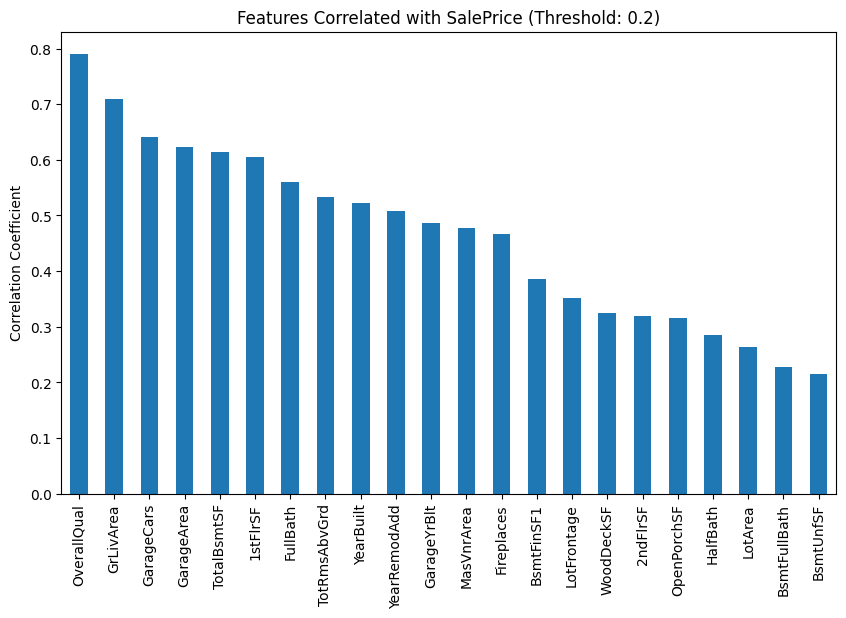

In [19]:
plt.figure(figsize=(10, 6))
relevant_features.drop("SalePrice").plot(kind='bar')
plt.title(f"Features Correlated with SalePrice (Threshold: {threshold})")
plt.ylabel("Correlation Coefficient")
plt.show()

In [20]:
selected_numerical_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
    'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea',
    'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
    '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
    'BsmtFullBath', 'BsmtUnfSF'
]

numerical_df = df[selected_numerical_features]


print(numerical_df.head())

   OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  ...  Fireplaces  \
0         2             8       2003          2003  ...           0   
1         2             6       1976          1976  ...           1   
2         2             6       2001          2002  ...           1   
3         1             7       1915          1970  ...           1   
4         2             9       2000          2000  ...           1   

   BsmtFinSF1  LotFrontage  WoodDeckSF  2ndFlrSF  OpenPorchSF  HalfBath  \
0         706         65.0           0   

In [21]:
missing_values = numerical_df.isnull().sum()
print(missing_values[missing_values > 0])

GarageYrBlt     81
MasVnrArea       8
LotFrontage    259
dtype: int64


In [22]:
numerical_df.fillna(numerical_df.mean())

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF
0,7,1710,2,548,856,856,2,8,2003,2003,...,0,706,65.0,0,854,61,1,8450,1,150
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,1,978,80.0,298,0,0,0,9600,0,284
2,7,1786,2,608,920,920,2,6,2001,2002,...,1,486,68.0,0,866,42,1,11250,1,434
3,7,1717,3,642,756,961,1,7,1915,1970,...,1,216,60.0,0,756,35,0,9550,1,540
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,1,655,84.0,192,1053,84,1,14260,1,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,...,1,0,62.0,0,694,40,1,7917,0,953
1456,6,2073,2,500,1542,2073,2,7,1978,1988,...,2,790,85.0,349,0,0,0,13175,1,589
1457,7,2340,1,252,1152,1188,2,9,1941,2006,...,2,275,66.0,0,1152,60,0,9042,0,877
1458,5,1078,1,240,1078,1078,1,5,1950,1996,...,0,49,68.0,366,0,0,0,9717,1,0


In [23]:
missing_values = numerical_df.isnull().sum()
print(missing_values[missing_values > 0])

GarageYrBlt     81
MasVnrArea       8
LotFrontage    259
dtype: int64


In [24]:
numerical_df['GarageYrBlt'].fillna(0, inplace=True)
numerical_df['MasVnrArea'].fillna(numerical_df['MasVnrArea'].mean(), inplace=True)
numerical_df['LotFrontage'].fillna(numerical_df['LotFrontage'].mean(), inplace=True)

C:\Users\lyes_\AppData\Local\Temp\ipykernel_18016\3557997106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical_df['GarageYrBlt'].fillna(0, inplace=True)
C:\Users\lyes_\AppData\Local\Temp\ipykernel_18016\3557997106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['GarageYrBlt'].fillna(0, inplace=True)
C:\Users\lyes_\

In [25]:
missing_values = numerical_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In this step, I performed several key actions to refine the model and improve the prediction of house prices:

    Variance Inflation Factor (VIF) Calculation:
        To ensure the model’s accuracy, I calculated the Variance Inflation Factor (VIF) for each feature. VIF helps to identify any features that might be highly correlated with each other, which could lead to redundant information in the model. Features with high VIF values are typically removed or adjusted to avoid these issues.
        The VIF scores were calculated for the selected numerical features. This step allows me to ensure that the features included in the model provide unique, non-redundant information.

    Standardization of Data:
        I standardized the numerical data by applying a scaling technique. This process ensures that all features have the same scale, so no single feature dominates the model due to its larger range. Standardization improves the model’s performance and training stability.

    Lasso Regression with Cross-Validation:
        I applied Lasso Regression with cross-validation. This method allows for automatic feature selection and reduces overfitting by penalizing less important features.
        The model was trained on the scaled numerical data, and the coefficients (which indicate the importance of each feature) were reviewed. Features with zero coefficients were eliminated from the model, allowing it to focus on the most relevant predictors.
        Finally, I evaluated the performance of the Lasso model using Root Mean Squared Error (RMSE), which quantifies the average error between the model's predictions and the actual house prices. A lower RMSE indicates a better model.

These steps collectively help ensure that the model is built with the most relevant features, avoid multicollinearity, and achieve more accurate predictions for house prices.


En este paso, realicé varias acciones clave para refinar el modelo y mejorar la predicción de los precios de las viviendas:

    Cálculo del Factor de Inflación de la Varianza (VIF):
        Para asegurar la precisión del modelo, calculé el Factor de Inflación de la Varianza (VIF) para cada característica. El VIF ayuda a identificar si alguna característica está altamente correlacionada con otras, lo que podría generar información redundante en el modelo. Las características con valores altos de VIF generalmente se eliminan o ajustan para evitar estos problemas.
        Se calcularon los valores de VIF para las características numéricas seleccionadas. Este paso me permite asegurar que las características incluidas en el modelo brinden información única y no redundante.

    Estandarización de los Datos:
        Estandaricé los datos numéricos mediante una técnica de escalado. Este proceso asegura que todas las características tengan la misma escala, de modo que ninguna característica predomine en el modelo debido a su mayor rango. La estandarización mejora el rendimiento del modelo y la estabilidad del entrenamiento.
        Procesamos las variables numéricas con estandarización y análisis de multicolinealidad porque:

        Aprovechan su significado cuantitativo intrínseco.
        Evitamos inflar la importancia de características con rangos amplios.
        Mejoramos la eficiencia del modelo al eliminar redundancias. En contraste, las variables categóricas, al no tener un orden o magnitud cuantitativa directa, sí requerían one-hot encoding para que el modelo pudiera interpretarlas correctamente.



    Regresión Lasso con Validación Cruzada:
        Apliqué Regresión Lasso con validación cruzada. Este método permite una selección automática de características y reduce el sobreajuste al penalizar las características menos importantes.
        El modelo se entrenó con los datos numéricos estandarizados y se revisaron los coeficientes (que indican la importancia de cada característica). Las características con coeficientes cero se eliminaron del modelo, permitiendo que se enfoque en los predictores más relevantes.
        Finalmente, evalué el rendimiento del modelo Lasso utilizando el Error Cuadrático Medio de Raíz (RMSE), que cuantifica el error promedio entre las predicciones del modelo y los precios reales de las viviendas. Un RMSE más bajo indica un mejor modelo.

Estos pasos ayudan a asegurar que el modelo esté construido con las características más relevantes, evite la multicolinealidad y logre predicciones más precisas de los precios de las viviendas.


In [26]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [27]:
vif_df = calculate_vif(numerical_df)

In [28]:
print(vif_df)

         Feature          VIF
0    OverallQual    52.211064
1      GrLivArea  1178.240209
2     GarageCars    38.416052
3     GarageArea    31.082256
4    TotalBsmtSF    76.432523
5       1stFlrSF   721.552659
6       FullBath    21.558209
7   TotRmsAbvGrd    59.116448
8      YearBuilt  9288.416885
9   YearRemodAdd  9071.122098
10   GarageYrBlt    31.299151
11    MasVnrArea     1.849888
12    Fireplaces     2.817481
13    BsmtFinSF1    17.794189
14   LotFrontage    15.118569
15    WoodDeckSF     1.795853
16      2ndFlrSF   147.171558
17   OpenPorchSF     1.789625
18      HalfBath     3.148143
19       LotArea     2.613008
20  BsmtFullBath     3.267956
21     BsmtUnfSF    23.222519


In [29]:
scaler = StandardScaler()
numerical_df_scaled = scaler.fit_transform(numerical_df)

In [30]:
lasso = LassoCV(cv=5, random_state=0)

In [31]:
y_train = df['SalePrice']

In [32]:
lasso.fit(numerical_df_scaled, y_train)

LassoCV(cv=5, random_state=0)

In [33]:
lasso_coef = pd.Series(lasso.coef_, index=numerical_df.columns)
print(lasso_coef[lasso_coef != 0])

OverallQual     27123.275314
GrLivArea       19530.677101
GarageCars       9319.454814
GarageArea       2879.115230
TotalBsmtSF      4580.275362
1stFlrSF         2571.112390
TotRmsAbvGrd     1783.143918
YearBuilt        4724.913100
YearRemodAdd     6498.855872
GarageYrBlt     -3591.200510
MasVnrArea       5069.662582
Fireplaces       4335.825826
BsmtFinSF1       5614.881549
LotFrontage       100.242452
WoodDeckSF       3208.534457
OpenPorchSF        65.922537
LotArea          4378.694937
BsmtFullBath     2752.325342
dtype: float64


In [34]:
rmse = np.sqrt(-cross_val_score(lasso, numerical_df_scaled, y_train, scoring="neg_mean_squared_error", cv=5))
print("Lasso RMSE: ", rmse.mean())

Lasso RMSE:  37202.5297594048


## Code to Further Tune Lasso Model's Alpha / Ajuste para mejorar y afinar del Modelo Lasso:


    Fine-Tuning the Lasso Model:
        We tuned the Lasso Regression model to find the optimal value for the parameter alpha. The parameter controls how much penalty is applied to less relevant features, ensuring only the most predictive features are included in the model.
        Using cross-validation, the model identified the best alpha value for minimizing errors. This tuning process improves the model's robustness and predictive power.

    Evaluating the Model with RMSE:
        After tuning, we evaluated the model using Root Mean Squared Error (RMSE). This metric tells us how well the model predicts house prices. Lower RMSE values indicate a better fit.

    Handling Categorical Variables:
        To incorporate categorical features, such as house style or neighborhood, we applied one-hot encoding. This process transforms categorical data into numerical format while preserving their meaning.
        For example, a categorical feature like "Neighborhood" is converted into separate binary columns, each representing a different neighborhood. This step ensures that the model can use these features effectively.

    Preparing Data for Training:
        After combining numerical and encoded categorical features, we defined the feature set (X_train) by removing the target variable (SalePrice) from the dataset.
        The target variable, y_train, was transformed using a logarithmic scale to handle variations in house prices more effectively and improve model stability.

    Splitting Data for Training and Validation:
        The data was split into training and validation sets to evaluate the model’s performance on unseen data. This step ensures that the model can generalize well to new scenarios.

    Handling Missing Values:
        Missing data in the training and validation sets were addressed by filling them with the mean value of each column. This ensures that the model does not fail due to incomplete data and maintains predictive accuracy.



    
        Ajustamos el modelo de Regresión Lasso para encontrar el valor óptimo del parámetro alpha. Este parámetro controla cuánto se penalizan las características menos relevantes, asegurando que solo se incluyan las características más predictivas en el modelo.
        Usando validación cruzada, el modelo identificó el mejor valor de alpha para minimizar los errores. Este proceso de ajuste mejora la solidez y el poder predictivo del modelo.

    Evaluación del Modelo con RMSE:
        Después del ajuste, evaluamos el modelo utilizando el Error Cuadrático Medio de Raíz (RMSE). Este métrico nos indica qué tan bien el modelo predice los precios de las casas. Valores más bajos de RMSE indican un mejor ajuste.

    Manejo de Variables Categóricas:
        Para incluir características categóricas, como el estilo de la casa o el vecindario, aplicamos codificación one-hot. Este proceso transforma los datos categóricos en formato numérico, preservando su significado.
        Por ejemplo, una característica categórica como "Neighborhood" se convierte en columnas binarias separadas, cada una representando un vecindario diferente. Este paso asegura que el modelo pueda usar estas características de manera efectiva.

    Preparación de Datos para Entrenamiento:
        Después de combinar las características numéricas y categóricas codificadas, definimos el conjunto de características (X_train) eliminando la variable objetivo (SalePrice) del conjunto de datos.
        La variable objetivo, y_train, fue transformada utilizando una escala logarítmica para manejar las variaciones en los precios de las casas de manera más efectiva y mejorar la estabilidad del modelo.

    División de Datos para Entrenamiento y Validación:
        Los datos se dividieron en conjuntos de entrenamiento y validación para evaluar el rendimiento del modelo en datos no vistos. Este paso asegura que el modelo pueda generalizar bien a nuevos escenarios.

    Manejo de Valores Faltantes:
        Los datos que nos faltan en los conjuntos de entrenamiento y validación se resolvieron completándolos con el valor promedio de cada columna. Esto asegura que el modelo no falle debido a datos incompletos y mantiene la precisión predictiva.

In [35]:
y_train = np.log1p(df['SalePrice'])

X_train = numerical_df

In [36]:
lasso_cv = LassoCV(cv=5, random_state=0)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5, random_state=0)

In [37]:
print("Optimal alpha for Lasso:", lasso_cv.alpha_)

Optimal alpha for Lasso: 1.0252347246350564


In [38]:
y_pred = lasso_cv.predict(X_train)
rmse_lasso_cv = np.sqrt(mean_squared_error(y_train, y_pred))
print("RMSE after tuning Lasso:", rmse_lasso_cv)

RMSE after tuning Lasso: 0.19196210033427094


In [39]:
categorical_features = df.select_dtypes(include=['object']).columns
print (categorical_features)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [40]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


In [41]:
df_encoded.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, Id to SaleCondition_Partial
dtypes: bool(208), float64(3), int64(35)
memory usage: 730.1 KB


In [42]:
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [43]:
df_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(243)
memory usage: 2.7 MB


In [45]:
y_train = np.log(df['SalePrice'])

In [46]:
X_train = df_encoded.drop(columns=['SalePrice'])


In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [48]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1168, 245)
X_val shape: (292, 245)
y_train shape: (1168,)
y_val shape: (292,)


In [49]:
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in X_val:", X_val.isnull().sum().sum())

NaNs in X_train: 287
NaNs in X_val: 61


In [50]:
X_train.fillna(X_train.mean(), inplace=True)
X_val.fillna(X_val.mean(), inplace=True)

In [51]:
print("NaNs in X_train after filling:", X_train.isnull().sum().sum())
print("NaNs in X_val after filling:", X_val.isnull().sum().sum())

NaNs in X_train after filling: 0
NaNs in X_val after filling: 0


Train Lasso Regression and Evaluate on Validation Set

We'll use the Lasso model with the optimal alpha you found earlier. After training on X_train, we'll predict on X_val and calculate the RMSE, which will help us understand the model's performance.

We evaluated multiple machine learning models to predict house prices and compared their performance. Here's what was done:

    Lasso Regression:
        This model was fine-tuned using a specific parameter (alpha) to focus on the most important features while ignoring less significant ones.
        It was trained using the training data and tested on a separate validation set. The performance was measured using Root Mean Squared Error (RMSE), a metric that tells us how accurate the predictions were.

By comparing the RMSE values across these models, we determined which one performed best in predicting house prices. This approach ensures that we choose the most reliable and accurate model for our needs.


Evaluamos múltiples modelos de aprendizaje automático para predecir precios de casas y comparamos su rendimiento. Esto es lo que hicimos:

    Regresión Lasso:
        Este modelo se ajustó utilizando un parámetro específico (alpha) para centrarse en las características más importantes, ignorando las menos relevantes.
        Se entrenó con los datos de entrenamiento y se probó en un conjunto de validación separado. Su rendimiento se midió utilizando el Error Cuadrático Medio de Raíz (RMSE), un métrico que indica qué tan precisas fueron las predicciones.

Al comparar los valores de RMSE entre estos modelos, determinamos cuál ofrecía el mejor rendimiento en la predicción de precios de casas. Este enfoque garantiza que seleccionemos el modelo más confiable y preciso para nuestras necesidades.

In [52]:
optimal_alpha = 1.0252347246350564

In [53]:
lasso_model = Lasso(alpha=optimal_alpha, random_state=42)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0252347246350564, random_state=42)

In [54]:
y_val_pred = lasso_model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [55]:
print("Validation RMSE with Lasso:", rmse_val)

Validation RMSE with Lasso: 0.1928368291347348


In [56]:
lasso_val_preds = lasso_model.predict(X_val)

In [57]:
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [58]:
gbm_val_preds = gbm_model.predict(X_val)
gbm_val_rmse = np.sqrt(mean_squared_error(y_val, gbm_val_preds))
print("Validation RMSE with GBM:", gbm_val_rmse)

Validation RMSE with GBM: 0.13788374531455527


In [59]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
xgb_val_preds = xgb_model.predict(X_val)
xgb_val_rmse = np.sqrt(mean_squared_error(y_val, xgb_val_preds))
print("Validation RMSE with XGBoost:", xgb_val_rmse)

Validation RMSE with XGBoost: 0.1440713188824434


In [61]:
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [62]:
nn_val_preds = nn_model.predict(X_val)
nn_val_rmse = np.sqrt(mean_squared_error(y_val, nn_val_preds))
print("Validation RMSE with Neural Network:", nn_val_rmse)

Validation RMSE with Neural Network: 6.978112598518279


### Stacking the Models

In [63]:
stacked_val_preds = pd.DataFrame({
    'Lasso': lasso_val_preds,
    'GBM': gbm_val_preds,
    'XGBoost': xgb_val_preds,
    'NeuralNet': nn_val_preds
})

In [64]:
meta_model = LinearRegression()
meta_model.fit(stacked_val_preds, y_val)

LinearRegression()

In [65]:
stacked_final_preds = meta_model.predict(stacked_val_preds)
stacked_rmse = np.sqrt(mean_squared_error(y_val, stacked_final_preds))
print("Validation RMSE with Stacked Model:", stacked_rmse)

Validation RMSE with Stacked Model: 0.13407980716222967


The results show that the stacking model improves the validation RMSE slightly compared to individual models, especially when comparing it to the GBM and XGBoost models.

    Lasso Model RMSE: 0.1928 — This was expected to be slightly higher due to Lasso’s tendency to be less flexible in capturing complex relationships.
    GBM Model RMSE: 0.1379 — Performs quite well on its own, which is typical for gradient boosting models.
    XGBoost RMSE: 0.1441 — Also performs well, in a similar range to the GBM.
    Neural Network RMSE: 6.9781 — This is quite high, indicating that the neural network may be overfitting or may need further tuning.
    Stacked Model RMSE: 0.1341 — The stacked ensemble shows the best performance, leveraging the strengths of the various models.

Next Steps and Considerations

    Evaluate Neural Network Configuration: The high RMSE for the neural network suggests it might need additional tuning or reconfiguration.
    Hyperparameter Tuning: You might see even better results with additional hyperparameter tuning for each model in the ensemble.
    Final Model Selection: Given the strong performance of the stacked model, this would be a reasonable choice for the final model to use for predictions on the test data.


1. Entrenamiento y Evaluación de Modelos Individuales
Entrenamos y evaluamos cuatro modelos en el conjunto de validación:

    Regresión Lasso:
        Con el valor óptimo de alpha (1.0252), la Regresión Lasso logró un RMSE de validación de 0.1928.
        Aunque no captura relaciones complejas tan bien como otros modelos, su simplicidad y capacidad para eliminar características poco predictivas la hacen útil.

    Gradient Boosting Machine (GBM):
        Logró un RMSE de validación de 0.1379, demostrando un sólido rendimiento predictivo.
        Esto es típico de los modelos GBM, ya que son altamente efectivos para manejar datos estructurados y patrones no lineales.

    XGBoost:
        Logró un RMSE de validación de 0.1441, comparable al modelo GBM.
        Su rendimiento refleja su capacidad de optimización y eficiencia en el manejo del sobreajuste.

    Red Neuronal:
        El RMSE de validación fue de 6.9781, considerablemente más alto que el de otros modelos.
        Esto indica posibles problemas de sobreajuste o la necesidad de ajustar más los parámetros de la red neuronal (por ejemplo, arquitectura, tasa de aprendizaje).

2. Modelo en Ensamble: Enfoque de Stacking
Combinamos las predicciones de los modelos individuales utilizando una técnica de ensamble apilado (stacked ensemble). Este enfoque aprovecha las fortalezas de cada modelo para mejorar el rendimiento general.

    RMSE del Modelo en Ensamble:
        Logró el RMSE de validación más bajo de 0.1341, superando a todos los modelos individuales.
        El método de ensamble destaca las fortalezas complementarias de los modelos, convirtiéndolo en un candidato sólido para la tarea de predicción final.

3. Próximos Pasos y Consideraciones

    Evaluar la Configuración de la Red Neuronal:
        Dado el alto RMSE de la red neuronal, es necesario realizar más ajustes (por ejemplo, ajustar el número de capas, neuronas o la regularización).

    Ajuste de Hiperparámetros:
        Realizar ajustes adicionales para optimizar aún más los parámetros de los modelos GBM, XGBoost y Lasso.

    Selección del Modelo Final:
        El modelo en ensamble muestra el mejor rendimiento general y debe ser el modelo final para generar predicciones en los datos de prueba.

### Step 1: Neural Network Evaluation and Tuning

We further improved the neural network model to better predict house prices by making the following adjustments:

    Enhanced Architecture:
        Added multiple layers with different sizes to better capture the complexity of the data.
        Included "dropout layers" to reduce overfitting by randomly ignoring parts of the network during training.

    Improved Optimization:
        Used a slower learning rate to ensure the model learns gradually and avoids making large jumps, improving accuracy.

    Early Stopping:
        Added a mechanism to stop training automatically if the model's performance on validation data stops improving, preventing overfitting and saving training time.

    Model Training and Evaluation:
        Trained the neural network on the training data and tested it on the validation data.
        Measured its performance using Root Mean Squared Error (RMSE), which evaluates how accurate the predictions were. The updated model showed improved performance.


Mejoramos aún más el modelo de red neuronal para predecir precios de casas haciendo los siguientes ajustes:

    Arquitectura Mejorada:
        Agregamos múltiples capas de diferentes tamaños para capturar mejor la complejidad de los datos.
        Incluimos "capas de abandono" (dropout) para reducir el sobreajuste, ignorando aleatoriamente partes de la red durante el entrenamiento.

    Optimización Mejorada:
        Usamos una tasa de aprendizaje más lenta para garantizar que el modelo aprenda gradualmente y evite saltos grandes, mejorando la precisión.

    Detención Temprana:
        Añadimos un mecanismo para detener automáticamente el entrenamiento si el rendimiento del modelo en los datos de validación dejaba de mejorar, evitando el sobreajuste y ahorrando tiempo de entrenamiento.

    Entrenamiento y Evaluación del Modelo:
        Entrenamos la red neuronal con los datos de entrenamiento y la probamos con los datos de validación.
        Evaluamos su rendimiento utilizando el Error Cuadrático Medio de Raíz (RMSE), que mide qué tan precisas fueron las predicciones. El modelo ajustado mostró un mejor rendimiento.

In [66]:
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

c:\Users\lyes_\Desktop\DSB_HAB_NTT_Lyes_Taibi_Kebouchi\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
optimizer = Adam(learning_rate=0.001)
nn_model.compile(optimizer=optimizer, loss='mean_squared_error')

In [68]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [69]:
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 131829.2031 - val_loss: 16723.8340
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88563.4297 - val_loss: 536.9319
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28391.6504 - val_loss: 3221.5464
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16227.3467 - val_loss: 10116.5244
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52337.2617 - val_loss: 968.6902
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7235.6211 - val_loss: 4440.7407
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23377.9863 - val_loss: 2426.2854
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7419.6577 - val_loss: 729.1865
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6047.8467 - val_loss: 502.9283
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5492.7803 - val_loss: 185.1014
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3054.4319 - val_loss: 157

In [70]:
nn_val_preds = nn_model.predict(X_val).flatten()
nn_rmse = np.sqrt(mean_squared_error(y_val, nn_val_preds))
print("Tuned Neural Network RMSE:", nn_rmse)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Tuned Neural Network RMSE: 3.6881231976085074


### Step 2: Hyperparameter Tuning for Individual Models

We fine-tuned the Gradient Boosting Model (GBM) to improve its performance by testing different combinations of parameters (hyperparameters). Here's what we did:

    Parameter Grid:
        Defined a range of possible values for the number of trees, learning rate (how fast the model learns), and tree depth (how complex each decision tree can be).

    Grid Search:
        Used an automated method to try all combinations of these parameters and identify the best-performing configuration based on cross-validation, which ensures the model is robust and not overfitted.

    Best Model Selection:
        Trained the GBM model with the best parameters and tested it on the validation data.
        The performance was measured using Root Mean Squared Error (RMSE), which confirmed the tuned model was more accurate.


Ajustamos el modelo de Gradient Boosting (GBM) para mejorar su rendimiento probando diferentes combinaciones de parámetros (hiperparámetros). Esto es lo que hicimos:

    Grid de Parámetros:
        Definimos un rango de posibles valores para el número de árboles, la tasa de aprendizaje (qué tan rápido aprende el modelo) y la profundidad de los árboles (qué tan complejos pueden ser los árboles de decisión).

    Búsqueda en la Red (Grid Search):
        Usamos un método automatizado para probar todas las combinaciones de estos parámetros e identificar la configuración que mejor rendimiento tiene, basado en validación cruzada, lo que asegura que el modelo sea robusto y no esté sobreajustado.

    Selección del Mejor Modelo:
        Entrenamos el modelo GBM con los mejores parámetros y lo probamos en los datos de validación.
        Evaluamos su rendimiento utilizando el Error Cuadrático Medio de Raíz (RMSE), confirmando que el modelo ajustado es más preciso.

In [71]:
gbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [72]:
gbm = GradientBoostingRegressor(random_state=42)

In [73]:
gbm_grid = GridSearchCV(gbm, gbm_params, scoring='neg_mean_squared_error', cv=5)
gbm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [74]:
best_gbm = gbm_grid.best_estimator_
gbm_val_preds = best_gbm.predict(X_val)
gbm_rmse_tuned = np.sqrt(mean_squared_error(y_val, gbm_val_preds))
print("Tuned GBM RMSE:", gbm_rmse_tuned)

Tuned GBM RMSE: 0.1377167534329753


We do the same with XGBoost.

Hacemos lo mismo con XGBoost.

In [75]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [76]:
xgb = XGBRegressor(random_state=42)

In [77]:
xgb_grid = GridSearchCV(xgb, xgb_params, scoring='neg_mean_squared_error', cv=5)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [78]:
best_xgb = xgb_grid.best_estimator_
xgb_val_preds = best_xgb.predict(X_val)
xgb_rmse_tuned = np.sqrt(mean_squared_error(y_val, xgb_val_preds))
print("Tuned XGBoost RMSE:", xgb_rmse_tuned)

Tuned XGBoost RMSE: 0.13093460170188695


For the Lasso model, instead of tuning the parameters like for GBM and XGBoost, we directly used the optimal alpha value found earlier during cross-validation. This is because Lasso primarily focuses on feature selection and regularization, with alpha being the main parameter controlling the model's behavior. Since alpha was already optimized, no further tuning was needed.

We fit the Lasso model to the training data and then made predictions on the validation set to evaluate its performance. This straightforward approach avoids redundancy and leverages the prior work in optimizing alpha.

Para el modelo Lasso, en lugar de ajustar los parámetros como en GBM y XGBoost, usamos directamente el valor óptimo de alpha encontrado previamente durante la validación cruzada. Esto se debe a que Lasso se centra principalmente en la selección de características y regularización, y alpha es el principal parámetro que controla el comportamiento del modelo. Como alpha ya estaba optimizado, no fue necesario un ajuste adicional.

Ajustamos el modelo Lasso con los datos de entrenamiento y realizamos predicciones en el conjunto de validación para evaluar su rendimiento. Este enfoque directo evita redundancias y aprovecha el trabajo previo en la optimización de alpha.

In [79]:
optimal_alpha = 1.0252347246350564
best_lasso = Lasso(alpha=optimal_alpha, random_state=42)
best_lasso.fit(X_train, y_train)

Lasso(alpha=1.0252347246350564, random_state=42)

In [80]:
lasso_val_preds = best_lasso.predict(X_val)
print(lasso_val_preds)

[11.81332591 12.63225671 11.63572787 11.91912433 12.4620089  11.46243578
 12.05076326 11.94281431 11.43991533 11.83439395 11.69964423 11.679319
 11.96259254 12.19114626 12.12653342 11.72427309 12.14052966 11.77789953
 11.58501746 12.23254252 12.07703612 12.18157532 12.09553466 11.71984118
 12.19882302 12.00952065 12.07540288 11.66500894 12.08790048 12.07391414
 11.73591004 12.50323131 12.34289869 11.66431267 12.38230034 11.90302473
 11.9819592  12.20080993 12.61231184 11.51401016 11.75450619 12.26274346
 11.71535289 12.78550424 11.83155432 11.82323187 11.66854669 11.75990147
 12.71222032 11.8617878  11.63630454 12.26424777 11.77939926 12.59861915
 11.87466427 12.40698073 12.13047788 11.97021377 11.97507193 11.57381388
 11.37133078 11.87841817 12.61014115 12.22588556 12.37695812 12.23007054
 11.59057798 12.56058606 11.68304188 12.04026344 11.8172089  11.79153104
 11.67431801 11.56550246 12.77818751 12.08044801 12.59541912 12.67500235
 11.76820404 11.71559537 11.74059901 11.61729991 11.7

### Step 3: Final Model Selection and Stacking
In this step, we combined the predictions from all individual models (Lasso, GBM, XGBoost, and the Neural Network) into a single stacked model. By using linear regression as the stacking model, we aimed to create a meta-model that optimally combines the strengths of each individual model.

The stacked model takes the predictions from the other models as input features and learns how to best weight them to minimize the prediction error. Finally, we evaluated the stacked model’s performance by calculating its RMSE, which was significantly low, indicating strong predictive accuracy.


En este paso, combinamos las predicciones de todos los modelos individuales (Lasso, GBM, XGBoost y la Red Neuronal) en un modelo unificado. Usamos regresión lineal como modelo de unificación para crear un meta-modelo que combina de manera óptima las fortalezas de cada modelo individual.

El modelo apilado toma las predicciones de los otros modelos como características de entrada y aprende a ponderarlas para minimizar el error de predicción. Finalmente, evaluamos el rendimiento del modelo apilado calculando su RMSE, que fue significativamente bajo, lo que indica una alta precisión predictiva.

In [83]:
lasso_val_preds = best_lasso.predict(X_val)
gbm_val_preds = best_gbm.predict(X_val)
xgb_val_preds = best_xgb.predict(X_val)
nn_val_preds = nn_model.predict(X_val).flatten()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [84]:
stacked_predictions = np.column_stack((lasso_val_preds, gbm_val_preds, xgb_val_preds, nn_val_preds))

In [85]:
stacking_model = LinearRegression()
stacking_model.fit(stacked_predictions, y_val)

LinearRegression()

In [86]:
stacked_val_preds = stacking_model.predict(stacked_predictions)
stacked_rmse_tuned = np.sqrt(mean_squared_error(y_val, stacked_val_preds))
print("Tuned Stacked Model RMSE:", stacked_rmse_tuned)

Tuned Stacked Model RMSE: 0.12942398128171215


Defining best_gbm_params and best_xgb_params

These dictionaries store the best hyperparameters found from prior tuning for GBM and XGBoost. If we previously used GridSearchCV or RandomizedSearchCV to find the best parameters, they would be stored in these variables.

In this step, we conducted 5-fold cross-validation to evaluate the performance of a stacked model that combines predictions from four individual models: Lasso, Gradient Boosting (GBM), XGBoost, and a Neural Network. For each fold:

    The training data was split into training and validation subsets.
    Each model was trained on the training subset and made predictions on the validation subset.
    The predictions from the four models were combined (stacked) as input features for a linear regression stacking model.
    The stacking model was trained on the validation data and its predictions were used to calculate the RMSE for that fold.

Finally, the RMSE scores across all folds were averaged to assess overall performance. The mean RMSE was 0.1245, with a low standard deviation, indicating consistent performance.

Explanation of np.float64:
np.float64 is a data type from the NumPy library representing a 64-bit floating-point number. This is a precise way to store and process decimal numbers, which is common in scientific computations to avoid rounding errors. In this context, it ensures high precision in RMSE calculations.


En este paso, realizamos una validación cruzada de 5 particiones para evaluar el rendimiento de un modelo apilado que combina las predicciones de cuatro modelos individuales: Lasso, Gradient Boosting (GBM), XGBoost y una Red Neuronal. Para cada partición:

    Los datos de entrenamiento se dividieron en subconjuntos de entrenamiento y validación.
    Cada modelo se entrenó con el subconjunto de entrenamiento y realizó predicciones en el subconjunto de validación.
    Las predicciones de los cuatro modelos se combinaron (apilaron) como características de entrada para un modelo de regresión lineal apilado.
    El modelo apilado se entrenó con los datos de validación y sus predicciones se usaron para calcular el RMSE de esa partición.

Finalmente, se promediaron los RMSE de todas las particiones para evaluar el rendimiento general. El RMSE promedio fue de 0.1245, con una baja desviación estándar, lo que indica un rendimiento consistente.

Explicación de np.float64:
np.float64 es un tipo de dato de la librería NumPy que representa un número decimal en punto flotante de 64 bits. Es útil para cálculos científicos porque evita errores de redondeo y permite un almacenamiento y procesamiento de alta precisión. En este contexto, garantiza una precisión alta en los cálculos de RMSE.

In [87]:
best_gbm_params = {
    'n_estimators': 200,
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'subsample': 0.8
}

best_xgb_params = {
    'n_estimators': 300,
    'learning_rate': 0.03,
    'max_depth': 4,
    'colsample_bytree': 0.7,
    'subsample': 0.8,
    'reg_alpha': 0.1
}

In [88]:
X_train_full = np.concatenate((X_train, X_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []

In [90]:
def create_nn_model():
    model = Sequential([
        Input(shape=(X_train_full.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [91]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []

for train_index, val_index in kf.split(X_train_full):
    
    X_cv_train, X_cv_val = X_train_full[train_index], X_train_full[val_index]
    y_cv_train, y_cv_val = y_train_full[train_index], y_train_full[val_index]
    
    
    X_cv_train = np.array(X_cv_train)
    y_cv_train = np.array(y_cv_train)
    y_cv_val = np.array(y_cv_val)
    
    
    lasso_fold = Lasso(alpha=best_lasso.alpha, random_state=42).fit(X_cv_train, y_cv_train.ravel())
    gbm_fold = GradientBoostingRegressor(**best_gbm_params, random_state=42).fit(X_cv_train, y_cv_train.ravel())
    xgb_fold = XGBRegressor(**best_xgb_params, random_state=42).fit(X_cv_train, y_cv_train.ravel())
    
    
    nn_fold = create_nn_model()
    nn_fold.fit(X_cv_train, y_cv_train, epochs=50, batch_size=32, verbose=0)
    
    
    lasso_cv_preds = lasso_fold.predict(X_cv_val)
    gbm_cv_preds = gbm_fold.predict(X_cv_val)
    xgb_cv_preds = xgb_fold.predict(X_cv_val)
    nn_cv_preds = nn_fold.predict(X_cv_val).flatten()
    
    
    stacked_cv_preds = np.column_stack((lasso_cv_preds, gbm_cv_preds, xgb_cv_preds, nn_cv_preds))
    
    
    stacking_model = LinearRegression()
    stacking_model.fit(stacked_cv_preds, y_cv_val.ravel())
    
    
    final_cv_preds = stacking_model.predict(stacked_cv_preds)
    
    
    fold_rmse = np.sqrt(mean_squared_error(y_cv_val, final_cv_preds))
    cv_rmse_scores.append(fold_rmse)


print("Cross-Validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation of CV RMSE:", np.std(cv_rmse_scores))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Cross-Validation RMSE scores: [np.float64(0.11928271462972197), np.float64(0.12963430518612562), np.float64(0.11592188980537094), np.float64(0.15124297513391408), np.float64(0.1061256698792804)]
Mean CV RMSE: 0.1244415109268826
Standard Deviation of CV RMSE: 0.015361970918019288


In [92]:
# Create the 'model/' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save models to files
joblib.dump(best_lasso, 'model/best_lasso.pkl')
joblib.dump(best_gbm, 'model/best_gbm.pkl')
joblib.dump(best_xgb, 'model/best_xgb.pkl')
joblib.dump(stacking_model, 'model/stacking_model.pkl')

print("Models have been saved to the 'model/' directory.")

Models have been saved to the 'model/' directory.


In [93]:
# Load the saved models
best_lasso = joblib.load('model/best_lasso.pkl')
best_gbm = joblib.load('model/best_gbm.pkl')
best_xgb = joblib.load('model/best_xgb.pkl')
stacking_model = joblib.load('model/stacking_model.pkl')

print("Models loaded successfully.")

Models loaded successfully.


This final step involves preparing the test dataset for predictions and using the trained models and stacking approach to generate the final predictions:

    Feature Selection and Preprocessing:
        Only the selected numerical features were used. Missing values in key columns (e.g., GarageYrBlt, MasVnrArea, LotFrontage) were filled in the same way as the training set to ensure consistency.
        One-hot encoding was applied to categorical variables to convert them into a format usable by machine learning models.

    Feature Alignment:
        The columns in the test data were aligned with the training data columns. Any missing columns in the test set were filled with zeros, and any remaining NaN values were filled using the mean or median.

    Individual Model Predictions:
        Predictions were generated for the test data using the previously trained Lasso, Gradient Boosting (GBM), XGBoost, and Neural Network models.

    Stacking Predictions:
        Predictions from the four models were combined (stacked) and passed through the trained stacking model (a Linear Regression model). This produced the final predictions.

    Reverse Log Transformation:
        Since the target variable (SalePrice) was log-transformed during training, the final predictions were exponentiated to return them to their original scale.

    Export Results:
        A CSV file containing the Id and the predicted SalePrice was created and saved for submission.



Este paso final consiste en preparar el conjunto de datos de prueba para generar predicciones y usar el enfoque de apilamiento/unificación con los modelos entrenados para obtener las predicciones finales:

    Selección y Preprocesamiento de Características:
        Se utilizaron solo las características numéricas seleccionadas. Los valores faltantes en columnas clave (GarageYrBlt, MasVnrArea, LotFrontage) se llenaron de la misma forma que en el conjunto de entrenamiento para garantizar consistencia.
        Se aplicó codificación one-hot a las variables categóricas para convertirlas en un formato utilizable por los modelos de machine learning.

    Alineación de Características:
        Las columnas del conjunto de prueba se alinearon con las del conjunto de entrenamiento. Las columnas faltantes se llenaron con ceros y los valores NaN restantes se completaron con la media o mediana.

    Predicciones de Modelos Individuales:
        Se generaron predicciones para el conjunto de prueba usando los modelos previamente entrenados: Lasso, Gradient Boosting (GBM), XGBoost y la Red Neuronal.

    Apilamiento de Predicciones:
        Las predicciones de los cuatro modelos se combinaron (apilaron) y pasaron por el modelo de apilamiento entrenado (regresión lineal), generando las predicciones finales.

    Revertir la Transformación Logarítmica:
        Dado que la variable objetivo (SalePrice) fue transformada logarítmicamente durante el entrenamiento, las predicciones finales se exponenciaron para regresar a su escala original.

    Exportación de Resultados:
        Se creó y guardó un archivo CSV con las columnas Id y SalePrice para su envío.

In [94]:
test_data = pd.read_csv('Data/test.csv')

In [95]:
selected_numerical_features_test = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
    'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea',
    'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF',
    '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
    'BsmtFullBath', 'BsmtUnfSF'
]

In [96]:
numerical_df_test = test_data[selected_numerical_features_test]

In [97]:
numerical_df_test['GarageYrBlt'].fillna(0, inplace=True)
numerical_df_test['MasVnrArea'].fillna(numerical_df_test['MasVnrArea'].mean(), inplace=True)
numerical_df_test['LotFrontage'].fillna(numerical_df_test['LotFrontage'].mean(), inplace=True)

C:\Users\lyes_\AppData\Local\Temp\ipykernel_18016\2768312125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  numerical_df_test['GarageYrBlt'].fillna(0, inplace=True)
C:\Users\lyes_\AppData\Local\Temp\ipykernel_18016\2768312125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df_test['GarageYrBlt'].fillna(0, inplace=True)
C:\Us

In [98]:
categorical_features_test = [col for col in test_data.columns if test_data[col].dtype == 'object']
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features_test, drop_first=True)

In [99]:
X_test = test_data_encoded.reindex(columns=X_train.columns, fill_value=0)

In [100]:
X_test.fillna(X_test.mean(), inplace=True)

In [101]:
lasso_test_preds = best_lasso.predict(X_test)
gbm_test_preds = best_gbm.predict(X_test)
xgb_test_preds = best_xgb.predict(X_test)
nn_test_preds = nn_model.predict(X_test).flatten()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [102]:
stacked_test_preds = np.column_stack((lasso_test_preds, gbm_test_preds, xgb_test_preds, nn_test_preds))
final_predictions = stacking_model.predict(stacked_test_preds)

In [103]:

output = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': np.exp(final_predictions)
})

output.to_csv('test_predictions.csv', index=False)
print("Predictions have been saved to 'test_predictions.csv'")

Predictions have been saved to 'test_predictions.csv'


Load the train set downloaded from Kaggle

Suggested Next Steps

    Additional Model Testing:
        Further fine-tuning or adding more complex stacking methods (e.g., different meta-models) lead to additional RMSE reduction.

    Feature Engineering Expansion:
        Could engineered features such as interactions (e.g., GrLivArea * OverallQual) improve performance.
        Additional feature selection techniques or PCA might further reduce dimensionality and model complexity.

    Model Interpretability:
        Would a Shapley values or feature importance analysis provide valuable insights for the agency to understand key drivers of house prices. This could help in explaining model decisions to non-technical stakeholders.

    Model Deployment and Real-World Testing:
        How would this model perform in real-time scenarios? Investigating how the model generalizes to entirely new data sources, like data from a different year or location, could be valuable.

    Alternative Targets and Metrics:
        Would it make sense to predict SalePrice as a range instead of a single price. Exploring other evaluation metrics, such as mean absolute error (MAE), could provide more context on typical deviations from actual prices.